<a href="https://colab.research.google.com/github/saranme/classification_project/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

In [ ]:
df = pd.read_csv('creditcardmarketing.csv', names= ['offer_accepted','reward','mailer_type','income_level','bank_accounts_open','overdraft_protection','credit_rating','credit_cards_held','homes_owned','household_size','own_your_home','avg_balance','q1_balance','q2_balance','q3_balance','q4_balance'])
df.head()


,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [ ]:
df.shape

(18000, 16)

In [ ]:
df.isna().sum()

offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
avg_balance             24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.dtypes

offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
avg_balance             float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [ ]:
# checking value counts in every column
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('---------------------------')

offer_accepted
No     16955
Yes     1021
Name: offer_accepted, dtype: int64
---------------------------
reward
Air Miles    6047
Cash Back    5995
Points       5934
Name: reward, dtype: int64
---------------------------
mailer_type
Postcard    9134
Letter      8842
Name: mailer_type, dtype: int64
---------------------------
income_level
Medium    9002
High      4519
Low       4455
Name: income_level, dtype: int64
---------------------------
bank_accounts_open
1    13674
2     4007
3      295
Name: bank_accounts_open, dtype: int64
---------------------------
overdraft_protection
No     15300
Yes     2676
Name: overdraft_protection, dtype: int64
---------------------------
credit_rating
High      6064
Medium    5964
Low       5948
Name: credit_rating, dtype: int64
---------------------------
credit_cards_held
2    7933
1    6147
3    3381
4     515
Name: credit_cards_held, dtype: int64
---------------------------
homes_owned
1    14502
2     3289
3      185
Name: homes_owned, dtype: int6

In [ ]:
(df[df['avg_balance'].isna()].index == df[df['q2_balance'].isna()].index) == (df[df['q3_balance'].isna()].index == df[df['q3_balance'].isna()].index)

array([], dtype=bool)

In [ ]:
# what should we do with the null values?
df[df['avg_balance'].isna()]

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance


In [ ]:
summary = df.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
bank_accounts_open,17976.0,1.255730,0.472405,1.00,1.00,1.0,1.00,3.00
credit_cards_held,17976.0,1.903427,0.797086,1.00,1.00,2.0,2.00,4.00
homes_owned,17976.0,1.203549,0.427446,1.00,1.00,1.0,1.00,3.00
household_size,17976.0,3.499110,1.114476,1.00,3.00,3.0,4.00,9.00
avg_balance,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
q1_balance,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
q2_balance,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
q3_balance,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
q4_balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


# Getting possible values for the dependent variable

In [ ]:
df['offer_accepted'].value_counts()

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

# Functions

In [ ]:
# data separation in types
def data_sep(df,types, target=None):
    num_discrete = []
    num_continuous = []
    num = df.select_dtypes(include = np.number)
    for i in num.columns:
        if 'balance' in i:
            num_continuous.append(i)
        else:
            num_discrete.append(i)
    if types == 'numerical':
        return num
    elif types == 'discrete':
        return df[num_discrete]
    elif types == 'continuous':
        return df[num_continuous]
    else:
        cat = df.select_dtypes(include = np.object)
        cat = cat.drop(target, axis = 1)
        return cat

In [ ]:
def plots(df, types,target=None):
    import seaborn as sns
    if types == 'correlation matrix':
        corr_matrix=df.corr(method='pearson')
        fig, ax = plt.subplots(figsize=(10, 8))
        mask = np.zeros_like(corr_matrix)
        mask[np.triu_indices_from(mask)] = True
        ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
        return plt.show()
    for i in df.columns:
            print('Column: ',i)
            print('====================')
            if types == 'continuous':
                sns.distplot(df[i])
            elif types == 'categorical' or types == 'discrete':
                sns.countplot(x=i,data=df)
            elif types == 'boxplot':
                sns.boxplot(x=i, data=df)
            plt.show()
            print('====================')

In [ ]:
'''
def ordinals_conversor(df):
    df2 = df.copy()
    for col in ['income_level','overdraft_protection','credit_rating','own_your_home']:
        if len(df2[col].unique()) > 2:
            # df2[col] = np.where(df2[col] == 'High',2, np.where(df2[col]== 'Low',0, 1))
            df2[col]= list(map(lambda x: 2 if x == 'High' else (0 if x == 'Low' else 1),df2[col]))
        else:
            df2[col]= list(map(lambda x: 1 if x =='Yes' else 0,df2[col]))
    return df2
'''

"\ndef ordinals_conversor(df):\n    df2 = df.copy()\n    for col in ['income_level','overdraft_protection','credit_rating','own_your_home']:\n        if len(df2[col].unique()) > 2:\n            # df2[col] = np.where(df2[col] == 'High',2, np.where(df2[col]== 'Low',0, 1))\n            df2[col]= list(map(lambda x: 2 if x == 'High' else (0 if x == 'Low' else 1),df2[col]))\n        else:\n            df2[col]= list(map(lambda x: 1 if x =='Yes' else 0,df2[col]))\n    return df2\n"

In [ ]:
def ordinals_conversor(df):
    for col in ['income_level','overdraft_protection','credit_rating','own_your_home']:
        if len(df[col].unique()) > 2:
            # df2[col] = np.where(df2[col] == 'High',2, np.where(df2[col]== 'Low',0, 1))
            df[col]= list(map(lambda x: 2 if x == 'High' else (0 if x == 'Low' else 1),df[col]))
        else:
            df[col]= list(map(lambda x: 1 if x =='Yes' else 0,df[col]))

In [ ]:
# check if categoricals are dependent
def chi_test(df,x,y):
    from scipy.stats import chi2_contingency
    from scipy.stats import chi2
    # contingency table
    table = pd.crosstab(df[x], df[y])
    print(table)
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d' % dof)
    print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('!!!!! DEPENDENT (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    print('==========================================================')

In [ ]:
def skew_df(df):
    from scipy.stats import skew
    
    cols=list(df.columns)
    
    for col in cols:
        sk=df[col].skew()
        print("the skew of {} is: {}".format(col,sk))

# Data separation in types

In [ ]:
cat = data_sep(df,'cat','offer_accepted')
cat.head()

,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
1,Air Miles,Letter,High,No,High,No
2,Air Miles,Letter,Medium,No,Medium,Yes
3,Air Miles,Postcard,High,No,Medium,Yes
4,Air Miles,Letter,Medium,No,High,No
5,Air Miles,Letter,Medium,No,Medium,Yes


In [ ]:
num = data_sep(df,'numerical')
num.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [ ]:
num_cont = data_sep(df, 'continuous')
num_cont.head()

,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
1,1160.75,1669.0,877.0,1095.0,1002.0
2,147.25,39.0,106.0,78.0,366.0
3,276.50,367.0,352.0,145.0,242.0
4,1219.00,1578.0,1760.0,1119.0,419.0
5,1211.00,2140.0,1357.0,982.0,365.0


In [ ]:
num_disc = data_sep(df, 'discrete')
num_disc.head()

,bank_accounts_open,credit_cards_held,homes_owned,household_size
1,1,2,1,4
2,1,2,2,5
3,2,2,1,2
4,2,1,1,4
5,1,2,1,6


# Data Exploration

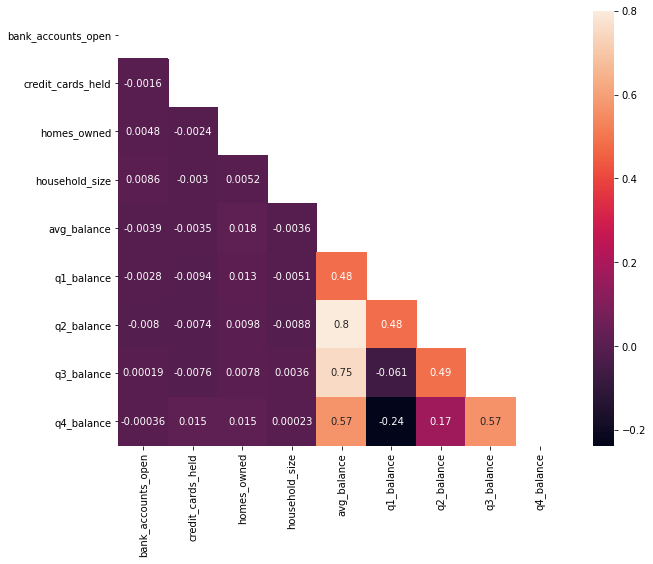

In [ ]:
plots(num,'correlation matrix')

Column:  avg_balance


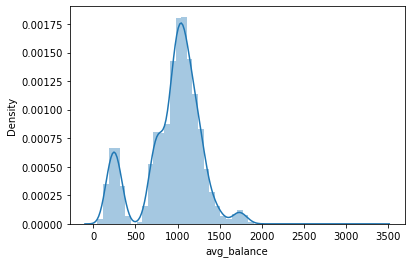

Column:  q1_balance


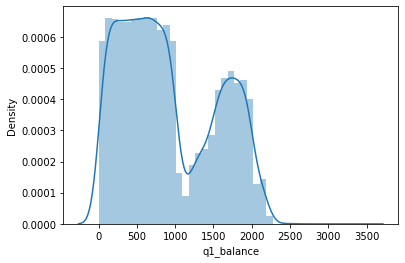

Column:  q2_balance


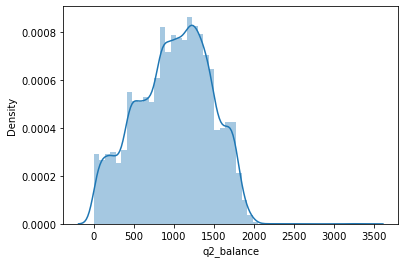

Column:  q3_balance


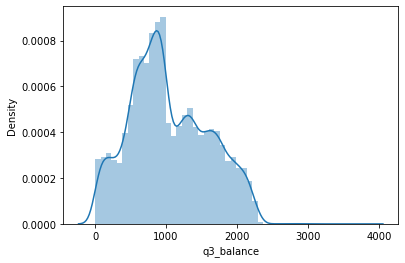

Column:  q4_balance


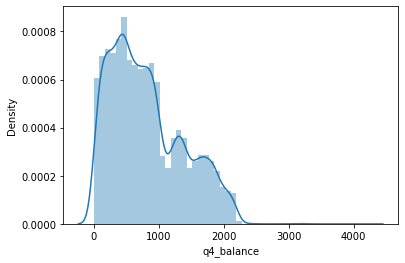

In [ ]:
# plotting continuous data
plots(num_cont,'continuous')

Column:  bank_accounts_open


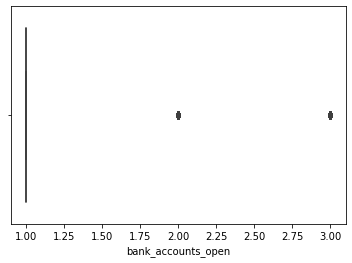

Column:  credit_cards_held


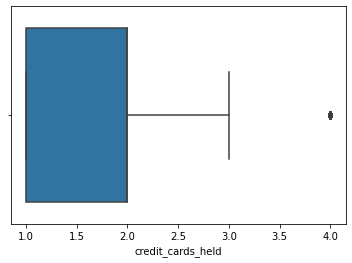

Column:  homes_owned


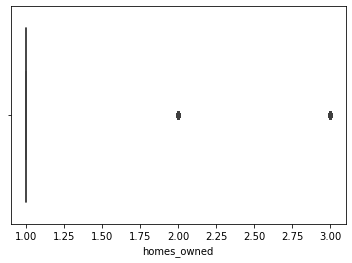

Column:  household_size


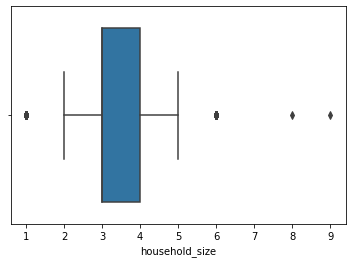

Column:  avg_balance


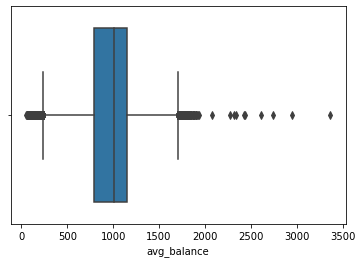

Column:  q1_balance


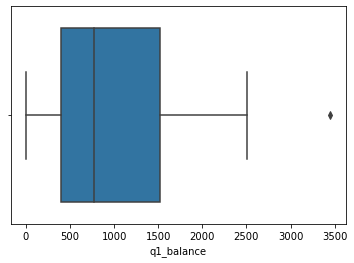

Column:  q2_balance


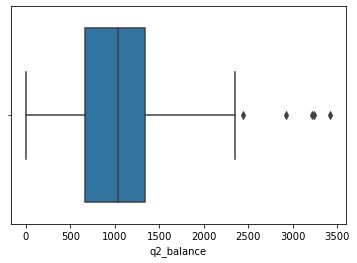

Column:  q3_balance


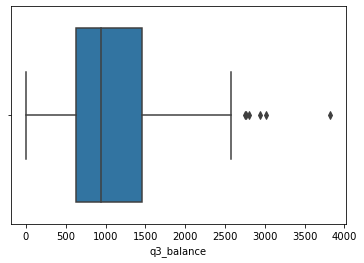

Column:  q4_balance


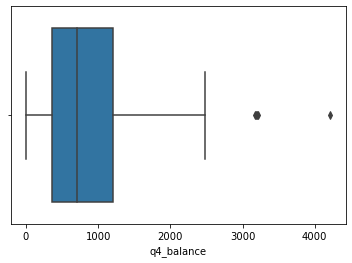

In [ ]:
plots(num,'boxplot')

Column:  bank_accounts_open


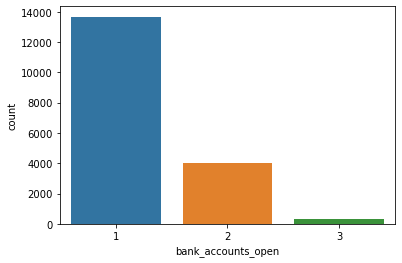

Column:  credit_cards_held


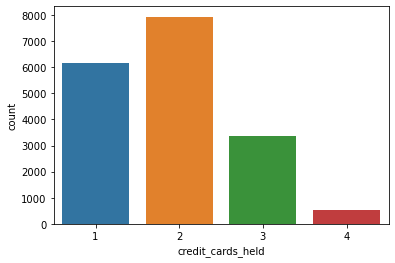

Column:  homes_owned


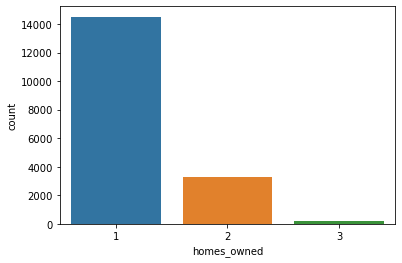

Column:  household_size


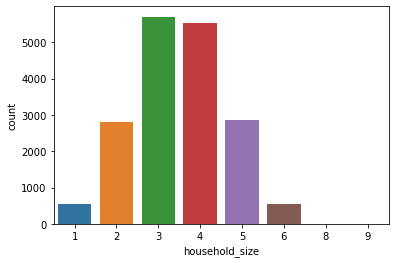

In [ ]:
plots(num_disc,'discrete')

Column:  reward


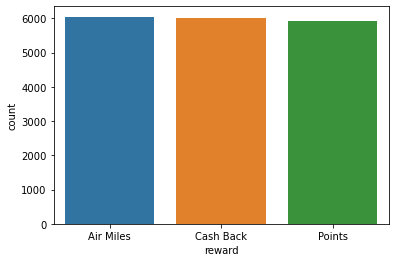

Column:  mailer_type


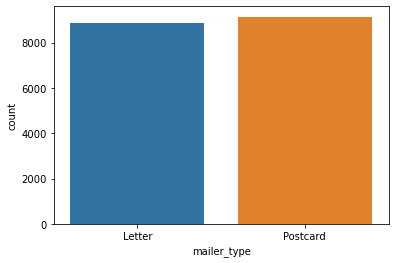

Column:  income_level


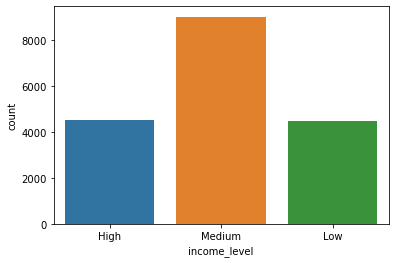

Column:  overdraft_protection


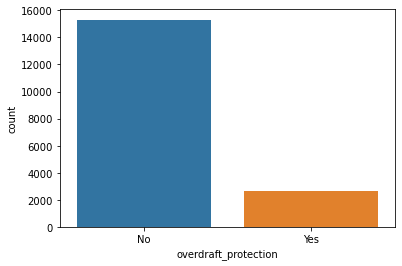

Column:  credit_rating


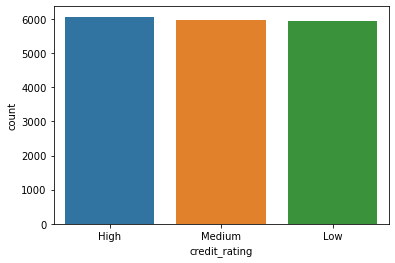

Column:  own_your_home


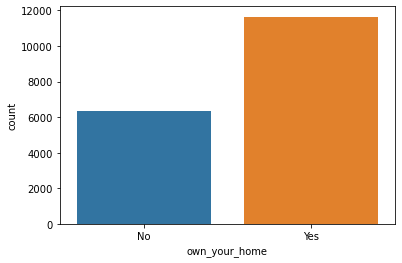

In [ ]:
plots(cat,'categorical')

# Categorical Data Dummifying

In [ ]:
# converting ordinals
ordinals_conversor(cat)

In [ ]:
cat['income_level'].unique()

array([2, 1, 0])

In [ ]:
# Dummifying categorical nominals
cat_df = pd.get_dummies(cat, columns=['reward', 'mailer_type'])
cat_df

,income_level,overdraft_protection,credit_rating,own_your_home,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard
1,2,0,2,0,1,0,0,1,0
2,1,0,1,1,1,0,0,1,0
3,2,0,1,1,1,0,0,0,1
4,1,0,2,0,1,0,0,1,0
5,1,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
17996,2,0,0,1,0,1,0,1,0
17997,2,0,0,1,0,1,0,1,0
17998,2,0,0,0,0,1,0,1,0
17999,1,0,1,1,0,1,0,1,0


In [ ]:
# checking if categoricals are dependent
for i in cat.columns:
    for v in cat.columns:
        if i != v:
            print('==========================================================')
            print('RELATIONSHIP {} and {}'.format(i.upper(),v.upper()))
            chi_test(cat,i,v)

RELATIONSHIP REWARD and MAILER_TYPE
mailer_type  Letter  Postcard
reward                       
Air Miles      2946      3101
Cash Back      2965      3030
Points         2931      3003
dof=2
[[2974.38662661 3072.61337339]
 [2948.80896751 3046.19103249]
 [2918.80440587 3015.19559413]]
probability=0.950, critical=5.991, stat=0.808
Independent (fail to reject H0)
significance=0.050, p=0.668
Independent (fail to reject H0)
RELATIONSHIP REWARD and INCOME_LEVEL
income_level     0     1     2
reward                        
Air Miles     1533  3023  1491
Cash Back     1466  2993  1536
Points        1456  2986  1492
dof=4
[[1498.63067423 3028.20950156 1520.15982421]
 [1485.74349132 3002.16900312 1507.08750556]
 [1470.62583445 2971.62149533 1491.75267023]]
probability=0.950, critical=9.488, stat=2.417
Independent (fail to reject H0)
significance=0.050, p=0.660
Independent (fail to reject H0)
RELATIONSHIP REWARD and OVERDRAFT_PROTECTION
overdraft_protection     0    1
reward                     

1                      879   913   884
dof=2
[[5062.55006676 5076.1682243  5161.28170895]
 [ 885.44993324  887.8317757   902.71829105]]
probability=0.950, critical=5.991, stat=1.349
Independent (fail to reject H0)
significance=0.050, p=0.509
Independent (fail to reject H0)
RELATIONSHIP OVERDRAFT_PROTECTION and OWN_YOUR_HOME
own_your_home            0     1
overdraft_protection            
0                     5422  9878
1                      918  1758
dof=1
[[5396.19492657 9903.80507343]
 [ 943.80507343 1732.19492657]]
probability=0.950, critical=3.841, stat=1.231
Independent (fail to reject H0)
significance=0.050, p=0.267
Independent (fail to reject H0)
RELATIONSHIP CREDIT_RATING and REWARD
reward         Air Miles  Cash Back  Points
credit_rating                              
0                   1991       2004    1953
1                   1980       1979    2005
2                   2076       2012    1976
dof=4
[[2000.86537606 1983.65932354 1963.4753004 ]
 [2006.24766355 1988.99532

# Train-test split

In [ ]:
y = df['offer_accepted']
X = pd.concat([cat_df,num],axis=1)

In [ ]:
#Now define a function that takes a list of models and train (and tests) them so we
#can try a lot of them without repeating code.
def models(data, y, target, mode, k = 5, test_size=0.3, multiclass = 'multinomial'):
    # Train Test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    # linear model
    if mode == 'linear_model':
        from sklearn import linear_model
        lm = linear_model.LinearRegression()
        model =lm.fit(X_train,y_train)
        predictions  = lm.predict(X_test)
        predictions_df = pd.DataFrame(predictions, columns=[y.name])
    # K NeighborsRegressor
    elif mode == 'k-nn':
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.metrics import cohen_kappa_score
        model = KNeighborsClassifier(n_neighbors=k) # The keyword "n_neighbors" is what sets the K.
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(predictions, columns=[y.name])
        from sklearn.metrics import accuracy_score
        accuracy_score(predictions,y_test)
        print('K-NN MODEL')
        print ('The accuracy of KNN test is {}'.format(round(accuracy_score(predictions,y_test))))
        print("The kappa of the model is: ", cohen_kappa_score(y,model.predict(X)))
        print('====================================================')
    # Logistic model
    elif mode == 'logistic':
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import cohen_kappa_score
        model = LogisticRegression(random_state=0, solver='lbfgs', multi_class=multiclass).fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(model.predict(X_test))
        print('LOGISTIC MODEL')
        print("The accuracy of the LOGISTC model in the TEST set is: ", round(model.score(X_test, y_test),2))
        print("The kappa of the model is: ", cohen_kappa_score(y,model.predict(X)))
        print('====================================================')
    # ML Progressor
    elif mode == 'mlpregressor':
        from sklearn.neural_network import MLPRegressor
        model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
        predictions = model.predict(X_test)
        predictions_df = pd.DataFrame(predictions, columns=[y.name])
    # Dicision Tree
    elif mode == 'decisiontree':
        from sklearn import tree
        from sklearn.metrics import cohen_kappa_score
        model = tree.DecisionTreeClassifier()
        predictions = model.fit(X_train, y_train)
        predictions_df = pd.DataFrame(model.predict(X_test))
        print('DECISION TREE MODEL')
        print("The accuracy of the DECISION TRREE model in the TEST set is: ", round(model.score(X_test, y_test),2))
        print("The kappa of the model is: ", cohen_kappa_score(y,model.predict(X)))
        print('====================================================')
    else:
        print('something went wrong')
        print('====================================================')
    return predictions, predictions_df, model

predictions, predictions_df, model = models(X,y, 'offer_accepted', 'logistic')
predictions, predictions_df, model = models(X,y, 'offer_accepted', 'decisiontree')
predictions, predictions_df, model = models(X,y, 'offer_accepted', 'k-nn')

LOGISTIC MODEL
The accuracy of the LOGISTC model in the TEST set is:  0.94
The kappa of the model is:  0.0
DECISION TREE MODEL
The accuracy of the DECISION TRREE model in the TEST set is:  0.88
The kappa of the model is:  0.6845158750786628
K-NN MODEL
The accuracy of KNN test is 1
The kappa of the model is:  0.02411911872569772


# Numrical data preprocessing

In [ ]:
X2= X.copy()
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(X2)
transformed = pt.transform(X2) #this is a numpy array
pt = pd.DataFrame(transformed,columns = X.columns)
pt

,income_level,overdraft_protection,credit_rating,own_your_home,reward_Air Miles,reward_Cash Back,reward_Points,mailer_type_Letter,mailer_type_Postcard,bank_accounts_open,credit_cards_held,homes_owned,household_size,avg_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1.373150,-0.418213,1.170680,-1.354744,1.404533,-0.707372,-0.70198,1.016378,-1.016378,-0.560887,0.275786,-0.489441,0.456447,0.616723,1.146668,-0.251899,0.184885,0.505440
1,0.031319,-0.418213,0.078591,0.738147,1.404533,-0.707372,-0.70198,1.016378,-1.016378,-0.560887,0.275786,2.042056,1.337890,-2.027382,-1.973363,-1.998067,-2.098818,-0.696218
2,1.373150,-0.418213,0.078591,0.738147,1.404533,-0.707372,-0.70198,-0.983886,0.983886,1.778675,0.275786,-0.489441,-1.352034,-1.788324,-0.793575,-1.420652,-1.862524,-1.048943
3,0.031319,-0.418213,1.170680,-1.354744,1.404533,-0.707372,-0.70198,1.016378,-1.016378,1.778675,-1.242482,-0.489441,0.456447,0.806347,1.046546,1.635161,0.225748,-0.565470
4,0.031319,-0.418213,0.078591,0.738147,1.404533,-0.707372,-0.70198,1.016378,-1.016378,-0.560887,0.275786,-0.489441,2.207930,0.780125,1.624969,0.782233,-0.011469,-0.698780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,1.373150,-0.418213,-1.272313,0.738147,-0.711980,1.413683,-0.70198,1.016378,-1.016378,-0.560887,-1.242482,-0.489441,1.337890,-1.993261,-1.475298,-2.099144,-2.126644,-0.616148
17972,1.373150,-0.418213,-1.272313,0.738147,-0.711980,1.413683,-0.70198,1.016378,-1.016378,-0.560887,1.297965,-0.489441,-0.438908,-0.338521,0.303197,-0.114744,-0.080868,-0.307413
17973,1.373150,-0.418213,-1.272313,-1.354744,-0.711980,1.413683,-0.70198,1.016378,-1.016378,-0.560887,0.275786,-0.489441,0.456447,0.381862,0.207612,-0.492645,0.311679,1.160022
17974,0.031319,-0.418213,0.078591,0.738147,-0.711980,1.413683,-0.70198,1.016378,-1.016378,-0.560887,2.060783,2.042056,-1.352034,0.178423,-0.265226,-0.021410,-0.222451,1.302310


Column:  income_level


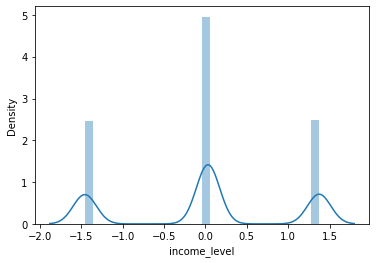

Column:  overdraft_protection


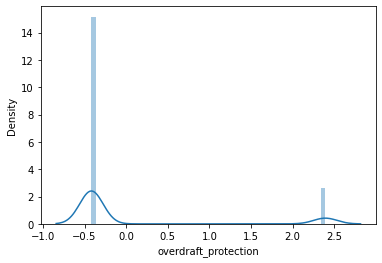

Column:  credit_rating


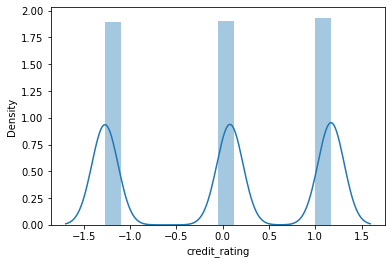

Column:  own_your_home


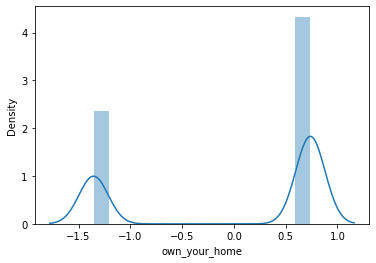

Column:  reward_Air Miles


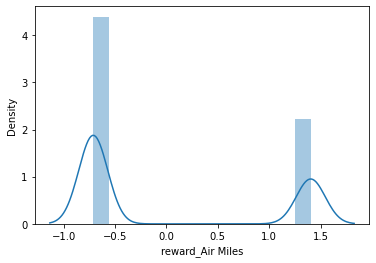

Column:  reward_Cash Back


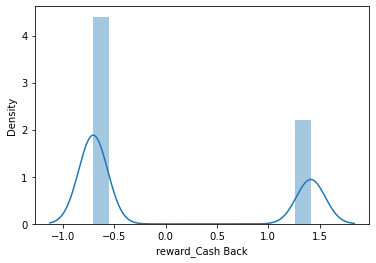

Column:  reward_Points


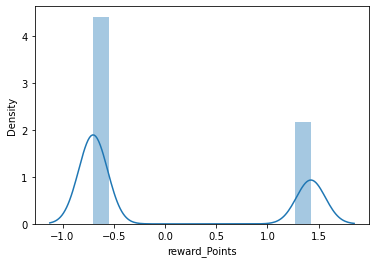

Column:  mailer_type_Letter


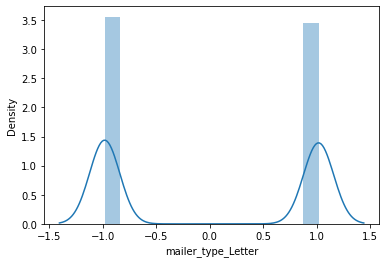

Column:  mailer_type_Postcard


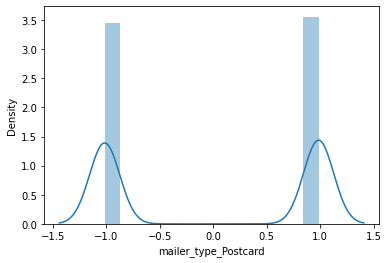

Column:  bank_accounts_open


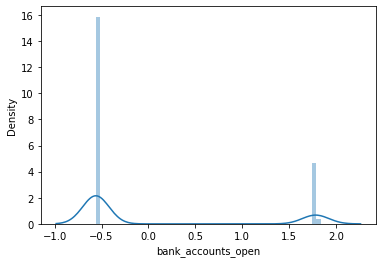

Column:  credit_cards_held


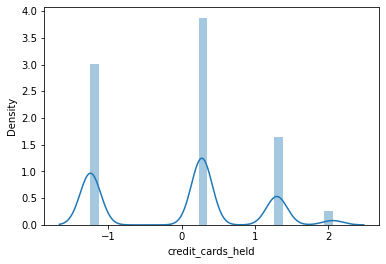

Column:  homes_owned


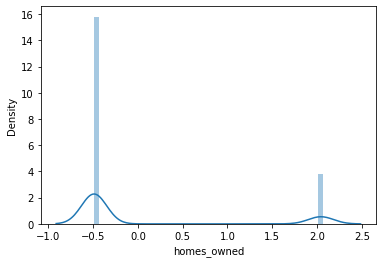

Column:  household_size


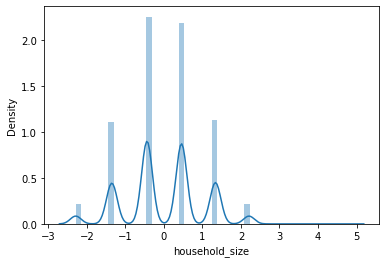

Column:  avg_balance


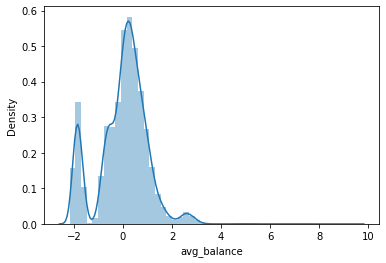

Column:  q1_balance


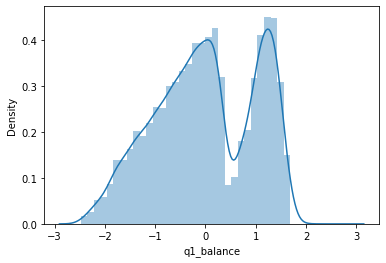

Column:  q2_balance


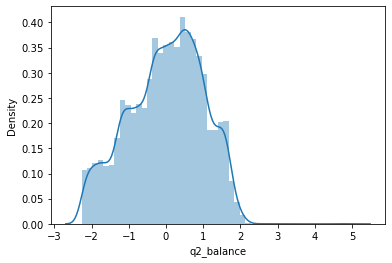

Column:  q3_balance


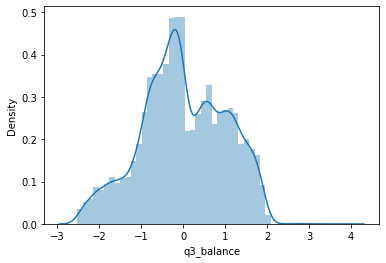

Column:  q4_balance


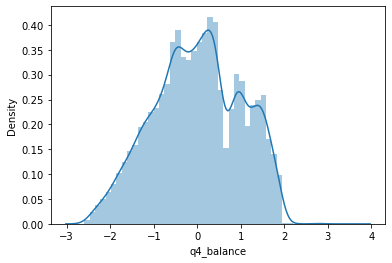

In [ ]:
plots(pt,'continuous')

In [ ]:

predictions, predictions_df, model = models(pt,y, 'offer_accepted', 'logistic')
predictions, predictions_df, model = models(pt,y, 'offer_accepted', 'decisiontree')
predictions, predictions_df, model = models(pt,y, 'offer_accepted', 'k-nn')

LOGISTIC MODEL
The accuracy of the LOGISTC model in the TEST set is:  0.94
The kappa of the model is:  0.0
DECISION TREE MODEL
The accuracy of the DECISION TRREE model in the TEST set is:  0.88
The kappa of the model is:  0.676720303531472
K-NN MODEL
The accuracy of KNN test is 1
The kappa of the model is:  0.02411911872569772


In [ ]:
from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import StandardScaler

# Normalizing data
transformer = Normalizer().fit(num)
num_normalized = transformer.transform(num)
num_df = pd.DataFrame(x_normalized)
num_df

NameError: name 'x_normalized' is not defined

In [ ]:
def imbalance_data(X,):
    from imblearn.under_sampling import TomekLinks
    transformer = 

tl = TomekLinks('majority')
X = df[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)
y = df['Churn']
X_tl, y_tl = tl.fit_sample(X_scaled, y)
pd.DataFrame(y_tl).value_counts()

In [ ]:
def scaling(df,target,scaler):
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import Normalizer
    from sklearn.preprocessing import PowerTransformer

    #StandardScaler
    if scaler=="StandardScaler":
        scaler_x = StandardScaler().fit(X)
        X_scaled = pd.DataFrame(scaler_x.transform(X),columns=X.columns)
        
    # MinMaxScaler
    elif scaler=="MinMax":
        X_scaled = MinMaxScaler().fit_transform(X.values)
        X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

    # Normalizer
    elif scaler=="Normalizer":
        transformer = Normalizer().fit(X)
        X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
    
    # Power transformer
    elif scaler == 'PowerTransformer':
        transformer = PowerTransformer().fit(X)
        X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)

    return X_scaled, Y

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
X_down = X.copy()
X_down = RandomUnderSampller()
transformer = StandardScaler().fit(X_down)
X_scaled = transformer.transform(X_down)
X_down, y_down = df_down.fit_sample(X_scaled,y)

pd.DataFrame(y_down).value_counts()

In [ ]:
classification = LogisticRegrression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_down, y_down)
print('The accuracy of the model is: ', round(classification.score(X_down,y_down),2))
print('The kappa of the modeel is: ', round(cohen_kappa_scorre(y_down,classification.predict(X_down)),2))

In [ ]:
# Train- test split

In [ ]:
predictions, predictions_df, model = models(X_power, y, 'offer_accepted','decisiontree')

In [ ]:
def samplings(X,sampling):
    from sklearn.preprocessing import StandardScaler
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.over_sampling import RandomOverSampler
    from imblearn.under_sampling import TomekLinks

    if sampling =='downsampling':
        s = RandomUnderSampler()
    elif sampling == 'upsampling':
        s = RandomOverSampler()
    elif  samplling == 'tomeklinks':
        s = TomekLinks('majority')
    X_scaled = StandardScaler().fit(X).transform(X)
    X_s, y_s = s.fit_sample(X_scaled,y)
    return pd.DataFrame(X_s).value_counts(), pd.DataFrame(y_s).value_counts()
samplings(X,'downsampling')

ImportError: cannot import name 'safe_indexing' from 'sklearn.utils' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py)

In [ ]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)

print("The accuracy of the model is: ",round(classification.score(X_tl, y_tl),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_tl,classification.predict(X_tl)),2))

In [ ]:
pip install imblearn